In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [2]:
from typing import Optional

from pydantic import BaseModel, Field, ConfigDict

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=init_chat_model("groq:openai/gpt-oss-120b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x111305a90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x111306660>, model_name='openai/gpt-oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
from agent.states import *
from agent.prompts import *
from agent.tools import sympy_code_generator_and_executor

/Users/rutvikhamar/Desktop/HighSchool_Helper/agent/prompts.py:81: SyntaxWarning: invalid escape sequence '\('
  prompt = """


In [6]:
tools = [sympy_code_generator_and_executor]

In [7]:
llm_with_tool = llm.bind_tools(tools)

In [8]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [9]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

In [10]:
from langgraph.graph import MessagesState

# System message
sys_msg = SystemMessage(content=math_agent_promt())

# Node
def math_assistant(state: MessagesState):
   return {"messages": [llm_with_tool.invoke([sys_msg] + state["messages"])]}


In [11]:
# from langgraph.prebuilt import create_react_agent
# from langchain_core.prompts import ChatPromptTemplate

# system_prompt = math_agent_promt()

# # Create the agent with a custom system prompt
# math_agent = create_react_agent(
#     llm,
#     tools,
#     state_modifier=system_prompt
# )

In [12]:
# ## Stategraph
# from langgraph.graph import StateGraph,START,END
# from langgraph.prebuilt import ToolNode
# from langgraph.prebuilt import tools_condition

# ## Node definition
# def tool_calling_llm(state:State):
#     return {"messages":[llm_with_tool.invoke(state["messages"])]}

# ## Grpah
# builder=StateGraph(State)
# builder.add_node("tool_calling_llm",tool_calling_llm)
# builder.add_node("tools",ToolNode(tools))

# ## Add Edges
# builder.add_edge(START, "tool_calling_llm")
# builder.add_conditional_edges(
#     "tool_calling_llm",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition
# )
# builder.add_edge("tools","tool_calling_llm")

# ## compile the graph
# graph=builder.compile()

# from IPython.display import Image, display
# display(Image(graph.get_graph().draw_mermaid_png()))

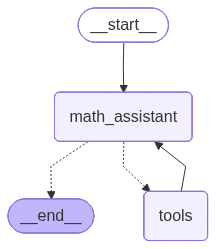

In [13]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("math_assistant", math_assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine the control flow
builder.add_edge(START, "math_assistant")
builder.add_conditional_edges(
    "math_assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "math_assistant")
graph = builder.compile()
graph

In [19]:
messages = [HumanMessage(content="Find the roots of x^2 - 5x + 6 = 0")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

Final Result: [2, 3]
================================ Human Message =================================

Find the roots of x^2 - 5x + 6 = 0
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_0687868e-ad61-425e-b59c-7bd3eb642101)
 Call ID: fc_0687868e-ad61-425e-b59c-7bd3eb642101
  Args:
    query: solve(x**2 - 5*x + 6, x)
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': [2, 3]}
================================== Ai Message ==================================

**Understanding**  
We need to find the values of x that satisfy the quadratic equation x² − 5x + 6 = 0.

**Reasoning**  
Factor the quadratic:  
x² − 5x + 6 = (x − 2)(x − 3) = 0.  

Set each factor equal to zero:  
x − 2 = 0  →  x = 2  
x − 3 = 0  →  x = 3  

**Final Answer**  
The roots are x = 2 and x = 3.


In [17]:
import math 

ans = math.sqrt(984376598347)
ans

992157.5471400699

In [15]:
print(messages['messages'][-1].content)

**Understanding**  
We need to find the values of x that make the quadratic expression x² − 4 equal to zero.

**Reasoning**  
Set the expression to zero:  
x² − 4 = 0  

Add 4 to both sides:  
x² = 4  

Take the square root of both sides, remembering both the positive and negative roots:  
x = ±2  

Thus the solutions are x = 2 and x = −2.

**Final Answer**  
The roots of the parabola x² − 4 are -2 and 2.


In [20]:
messages = [HumanMessage(content="Find the derivative of sin(x) * e^x")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Find the derivative of sin(x) * e^x
================================== Ai Message ==================================

**Understanding**  
We need the derivative with respect to x of the function f(x)=sin(x)·eˣ.

**Reasoning**  
Use the product rule: (u·v)' = u'·v + u·v'.  
Let u = sin(x) → u' = cos(x).  
Let v = eˣ   → v' = eˣ.  

Then  
f'(x) = u'·v + u·v'  
    = cos(x)·eˣ + sin(x)·eˣ  
    = eˣ·(cos(x) + sin(x)).

**Final Answer**  
The derivative is eˣ (cos x + sin x).


In [21]:
messages = [HumanMessage(content="Compute the integral of x^2 from 0 to 3")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()


Final Result: 9.00000000000000
================================ Human Message =================================

Compute the integral of x^2 from 0 to 3
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_427e5781-5fb3-48a8-851e-30df67dd6a20)
 Call ID: fc_427e5781-5fb3-48a8-851e-30df67dd6a20
  Args:
    query: integrate(x**2, (x, 0, 3))
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': 9.00000000000000}
================================== Ai Message ==================================

**Understanding**  
We need to find the definite integral of the function x² over the interval from x = 0 to x = 3.

**Reasoning**  
1. Find an antiderivative of x².  
   ∫ x² dx = x³ / 3 + C  

2. Evaluate this antiderivative at the limits of integration:  

   At x = 3: (3)³ / 3 = 27 / 3 = 9  
   At x = 0: (0)³ / 3 = 0  

3. Subtract the

In [22]:
messages = [HumanMessage(content="If I throw a ball upward with velocity 20 m/s, after how many seconds does it hit the ground? (assume g = 9.8 m/s^2, starting at height 0)")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()


Final Result: 4.08163265306122
================================ Human Message =================================

If I throw a ball upward with velocity 20 m/s, after how many seconds does it hit the ground? (assume g = 9.8 m/s^2, starting at height 0)
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_21570290-7689-4eb0-a965-8d5101bab872)
 Call ID: fc_21570290-7689-4eb0-a965-8d5101bab872
  Args:
    query: 20/4.9
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': 4.08163265306122}
================================== Ai Message ==================================

**Understanding**  
A ball is thrown upward from ground level (height 0) with an initial speed of 20 m/s. Under constant downward acceleration g = 9.8 m/s², we need the time when the ball returns to height 0.

**Reasoning**  
The height as a function of time t (

In [23]:
messages = [HumanMessage(content="If I throw a ball out a window that is 30 feet off of the ground at 10 miles per hour, how far from the building will the ball hit the ground assuming no air resistance?")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()


Final Result: 20.0831604418561
================================ Human Message =================================

If I throw a ball out a window that is 30 feet off of the ground at 10 miles per hour, how far from the building will the ball hit the ground assuming no air resistance?
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_d2aa5d2c-70ce-4955-a112-45424bc8c90f)
 Call ID: fc_d2aa5d2c-70ce-4955-a112-45424bc8c90f
  Args:
    query: import sympy as sp
v_mph = 10
v_fps = v_mph * 5280 / 3600
h = 30
g = 32
t = sp.sqrt(2*h/g)
d = v_fps * t
float(d)
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': 20.0831604418561}
================================== Ai Message ==================================

**Understanding**  
A ball is thrown horizontally from a window 30 ft above the ground with an initial speed of 10 mi/h. Wit

In [24]:
messages = [HumanMessage(content="Express (5 - 3i)^3 in the form a + ib.")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()


Final Result: -10.0 - 198.0*I
================================ Human Message =================================

Express (5 - 3i)^3 in the form a + ib.
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_9f86e148-0f1f-4b83-b362-26f0c1fc5ce0)
 Call ID: fc_9f86e148-0f1f-4b83-b362-26f0c1fc5ce0
  Args:
    query: (5 - 3*I)**3
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': -10.0 - 198.0*I}
================================== Ai Message ==================================

**Understanding**  
We need to expand \((5 - 3i)^3\) and write the result in the form \(a + ib\).

**Reasoning**  
Use the binomial theorem: \((x+y)^3 = x^3 + 3x^2y + 3xy^2 + y^3\).  
Let \(x = 5\) and \(y = -3i\).

1. Compute each term:  
   - \(x^3 = 5^3 = 125\)  
   - \(3x^2y = 3(5^2)(-3i) = 3(25)(-3i) = -225i\)  
   - \(3xy^2 = 3(5)(-3i)^2 = 15 \times 

In [25]:
messages = [HumanMessage(content="Ravi obtained 70 and 75 marks in first two unit test. Find the minimum marks he should get in the third test to have an average of at least 60 marks.")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Ravi obtained 70 and 75 marks in first two unit test. Find the minimum marks he should get in the third test to have an average of at least 60 marks.
================================== Ai Message ==================================

**Understanding**  
Ravi scored 70 and 75 in the first two unit tests. Let the marks needed in the third test be \(x\). We need the average of the three tests to be at least 60.

**Reasoning**  
Average of three tests: \((70 + 75 + x) / 3 \ge 60\)  

Multiply both sides by 3:  
\(70 + 75 + x \ge 180\)  

Combine the known marks:  
\(145 + x \ge 180\)  

Isolate \(x\):  
\(x \ge 180 - 145\)  
\(x \ge 35\)

Thus Ravi must obtain at least 35 marks in the third test.

**Final Answer**  
The minimum marks Ravi should get in the third test is **35**.


In [30]:
messages = [HumanMessage(content="Convert 40° 20' into radian measure")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

Final Result: 0.703949464971046
================================ Human Message =================================

Convert 40° 20' into radian measure
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_bec32586-941f-4a71-893a-7e65553f7855)
 Call ID: fc_bec32586-941f-4a71-893a-7e65553f7855
  Args:
    query: 121*pi/540
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': 0.703949464971046}
================================== Ai Message ==================================

**Understanding**  
We need to change an angle of 40° 20′ (40 degrees and 20 minutes) into radians.

**Reasoning**  
- 1 degree = π / 180 radians.  
- 1 minute = 1⁄60 degree, so in radians it is (π / 180) · (1⁄60) = π / 10800.  

Convert the minutes to degrees:  
20′ = 20 ⁄ 60 ° = 1⁄3 °.  

Total degrees = 40 ° + 1⁄3 ° = (120⁄3 + 1⁄3) ° = 121⁄3 °.  

Now co

In [31]:
messages = [HumanMessage(content="What is dimensional formula of Heat Enery")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is dimensional formula of Heat Enery
================================== Ai Message ==================================

**Understanding**  
The question asks for the dimensional formula of heat energy. Heat is a form of energy, so its dimensions are the same as those of any other type of energy.

**Reasoning**  
Energy (or work) is defined as force multiplied by distance.  
- Force has the dimensional formula M L T⁻².  
- Distance has the dimensional formula L.  

Multiplying these gives the dimensions of energy:  

M L T⁻² × L = M L² T⁻²  

Since heat is energy transferred due to temperature difference, it shares this same dimensional formula.

**Final Answer**  
The dimensional formula of heat energy is **M L² T⁻²**.


In [32]:
messages = [HumanMessage(content="In a ballistic demonstration a police officer fires a bullet of mass 50.0g with speed 200m/s on soft plywood of thickness 2.00cm. The bullet emerges with only 10% of its initial kinetic energy. What is the emergent speed of the bullet?")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

Final Result: 63.2455532033676
================================ Human Message =================================

In a ballistic demonstration a police officer fires a bullet of mass 50.0g with speed 200m/s on soft plywood of thickness 2.00cm. The bullet emerges with only 10% of its initial kinetic energy. What is the emergent speed of the bullet?
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_77cfb593-ff2c-4e9a-8044-1821efd146fe)
 Call ID: fc_77cfb593-ff2c-4e9a-8044-1821efd146fe
  Args:
    query: 200*sqrt(0.1)
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': 63.2455532033676}
================================== Ai Message ==================================

**Understanding**  
A bullet of mass 50.0 g leaves the plywood with only 10 % of its original kinetic energy. We need its speed after emerging.

**Reasoning**

In [33]:
messages = [HumanMessage(content="A batsman hits back a ball straight in the direction of the bowler without changing it's initial speed of 12m/s. If the mass of the ball is 0.15kg, determine the impulse imparted to the ball")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

Final Result: 3.60000000000000
================================ Human Message =================================

A batsman hits back a ball straight in the direction of the bowler without changing it's initial speed of 12m/s. If the mass of the ball is 0.15kg, determine the impulse imparted to the ball
================================== Ai Message ==================================
Tool Calls:
  sympy_code_generator_and_executor (fc_9ab195d7-d59a-4225-a193-72531cc06a2a)
 Call ID: fc_9ab195d7-d59a-4225-a193-72531cc06a2a
  Args:
    query: 0.15*(12 - (-12))
================================= Tool Message =================================
Name: sympy_code_generator_and_executor

{'Final_Result': 3.60000000000000}
================================== Ai Message ==================================

**Understanding**  
A cricket ball of mass 0.15 kg is hit back so that its speed remains 12 m/s but its direction reverses. We need the impulse given to the ball.

**Reasoning**  
Impulse = change in